# Hackathon : Reinforcement Learning for Drone Navigation

- Team name:
- Team members names:

## 0. Prerequisites

In [ ]:
# %pip install -r requirements.txt

In [8]:
%load_ext autoreload
%autoreload 2

import env
import agent
import reward
import simulate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Training

In [16]:
trained_agent, all_rewards, all_results = simulate.train('config.json')

Episode 2, Step 5000, Reward: -504791.00, Evacuated: 0, Deactivated: 1
Episode 3, Step 10, Reward: -911.00, Evacuated: 0, Deactivated: 2
Episode 4, Step 5000, Reward: -504692.00, Evacuated: 0, Deactivated: 1
Episode 5, Step 5000, Reward: -504186.00, Evacuated: 0, Deactivated: 1
Episode 6, Step 6, Reward: -683.00, Evacuated: 0, Deactivated: 2
Episode 7, Step 28, Reward: -1992.00, Evacuated: 0, Deactivated: 2
Episode 8, Step 4, Reward: -492.00, Evacuated: 0, Deactivated: 2
Episode 9, Step 5000, Reward: -503702.00, Evacuated: 0, Deactivated: 1
Episode 10, Step 5000, Reward: -504901.00, Evacuated: 0, Deactivated: 1
Episode 11, Step 5000, Reward: -502635.00, Evacuated: 0, Deactivated: 1
Episode 12, Step 5000, Reward: -503273.00, Evacuated: 0, Deactivated: 1
Episode 13, Step 5000, Reward: -504791.00, Evacuated: 0, Deactivated: 1
Episode 14, Step 10, Reward: -416.00, Evacuated: 0, Deactivated: 2
Episode 15, Step 27, Reward: 910.00, Evacuated: 1, Deactivated: 1
Episode 16, Step 19, Reward: -16

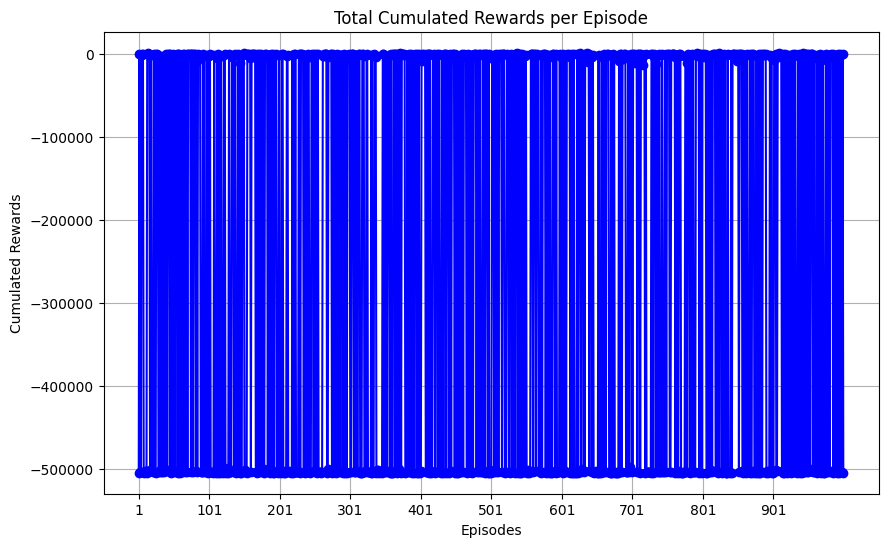

In [17]:
# Plot the cumulated rewards per episode
simulate.plot_cumulated_rewards(all_rewards)

In [20]:
print( all_results)

[[np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float32(0.0)], [np.float32(0.0), np.float3

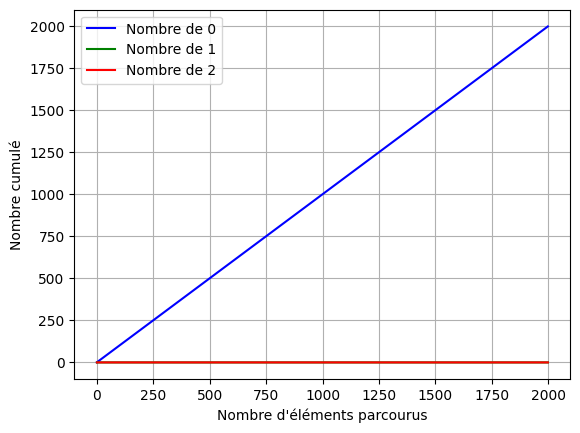

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cumulative_counts(data):

    arr = np.array(data, dtype=int)

    # Transformer en une liste plate
    flattened = arr.flatten()

    # Suivi du nombre cumulé des 0, 1 et 2
    count_0 = np.cumsum(flattened == 0)
    count_1 = np.cumsum(flattened == 1)
    count_2 = np.cumsum(flattened == 2)

    # Indices de progression
    steps = np.arange(1, len(flattened) + 1)

    # Affichage de l'évolution
    plt.plot(steps, count_0, label="Nombre de 0", color="blue")
    plt.plot(steps, count_1, label="Nombre de 1", color="green")
    plt.plot(steps, count_2, label="Nombre de 2", color="red")
    plt.xlabel("Nombre d'éléments parcourus")
    plt.ylabel("Nombre cumulé")
    plt.legend()
    plt.grid()
    plt.show()

plot_cumulative_counts(all_results)

## 2. Evaluation

In [ ]:
# eval_config_paths = [f"./eval_configs/config_{i}.json" for i in range(1, 11)]
eval_config_paths = [f"./config.json"] 

In [ ]:
all_results = simulate.evaluate(eval_config_paths, trained_agent)

In [ ]:
display(all_results)

In [ ]:
# Calculate averages for each configuration
averages = all_results.groupby('config_path').mean().reset_index().drop(columns=['episode'])
averages = averages.rename(columns={
    'steps': 'avg_steps',
    'reward': 'avg_reward',
    'evacuated': 'avg_evacuated',
    'deactivated': 'avg_deactivated'})

display(averages)
averages.to_csv('averages.csv', index=False)